In [83]:
import numpy as np
import matplotlib.pyplot as plt
x_real_sh = list()
z_real_sh = list()

x_v = list()
y_v = list()
z_v = list()

t_r = list()
for i in open("/dev/shm/vs_data.log").readlines():
    data = list(filter(lambda x: x != '', i.split(" ")))
    t_r.append(float(data[0]))
    x_real_sh.append(float(data[1]))
    z_real_sh.append(float(data[3]))

    
    
x_real_unsh = list()
z_real_unsh = list()

t_s = list()

for i in open("/dev/shm/a_data.log").readlines():
    data = list(filter(lambda x: x != '', i.split(" ")))
    t_s.append(float(data[0]))
    x_real_unsh.append(float(data[1]))
    z_real_unsh.append(float(data[3]))


x_kf = list()
t_kf = list()    
z_kf = list()

for i in open("/dev/shm/predicted_pose.log").readlines():
    data = list(filter(lambda x: x != '', i.split(" ")))
    t_kf.append(float(data[0]))
    x_kf.append(float(data[1]))
    z_kf.append(float(data[3]))

x_ee = list()
t_ee = list()
z_ee = list()
    
for i in open("/dev/shm/real_pose.log").readlines():
    data = list(filter(lambda x: x != '', i.split(" ")))
    t_ee.append(float(data[0]))
    x_ee.append(float(data[1]))
    z_ee.append(float(data[3]))

    
x_d = list()
t_d = list()
z_d = list()
    
for i in open("/dev/shm/vs_data_actual_pos.log").readlines():
    data = list(filter(lambda x: x != '', i.split(" ")))
    t_d.append(float(data[0]))
    x_d.append(float(data[1]))
    z_d.append(float(data[3]))
    x_v.append(float(data[4]))
    y_v.append(float(data[5]))
    z_v.append(float(data[6]))

   


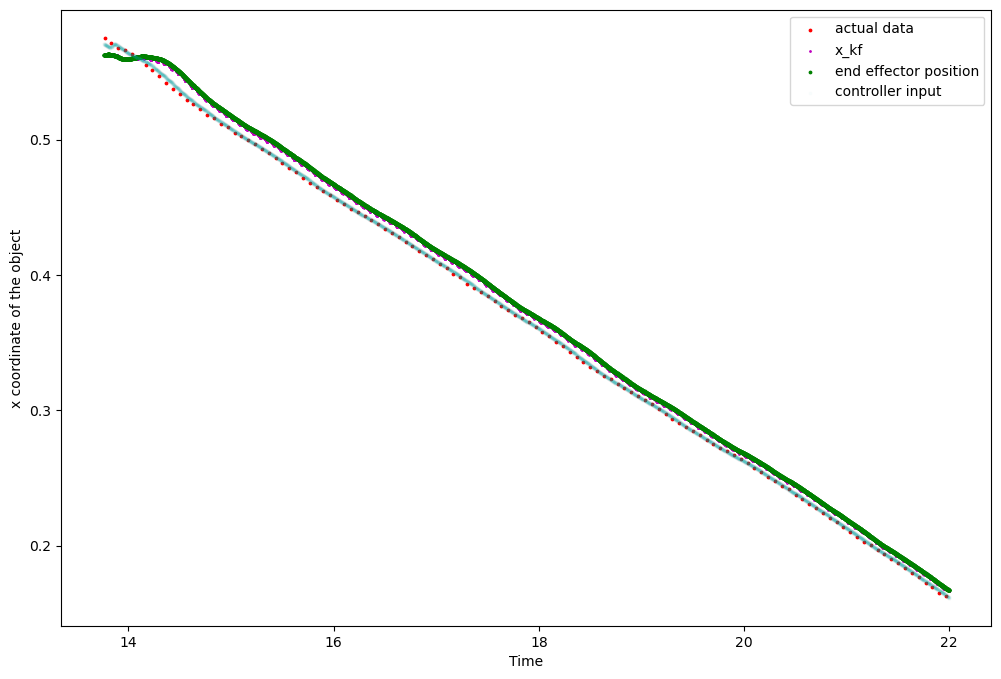

In [84]:
t_r = np.array(t_r)          
x_real_sh = np.array(x_real_sh)
x_v = np.array(x_v)
y_v = np.array(y_v)
z_v = np.array(z_v)

t_s = np.array(t_s)          
x_real_unsh = np.array(x_real_unsh)

t_kf = np.array(t_kf)          
x_kf = np.array(x_kf)

t_ee = np.array(t_ee)          
x_ee = np.array(x_ee)

t_d = np.array(t_d)          
x_d = np.array(x_d)

t_min = 12 
t_max =22



mask_sh = t_r < t_max
t_r = t_r[mask_sh]
x_real_sh = x_real_sh[mask_sh]




mask_unsh = t_s < t_max
t_s = t_s[mask_unsh]
x_real_unsh = x_real_unsh[mask_unsh]

mask_kf = t_kf < t_max
t_kf = t_kf[mask_kf]
x_kf = x_kf[mask_kf]

mask_ee = t_ee < t_max
t_ee = t_ee[mask_ee]
x_ee = x_ee[mask_ee]

mask_d = t_d < t_max
t_d = t_d[mask_d]
x_d = x_d[mask_d]
x_v = x_v[mask_d]
y_v = y_v[mask_d]
z_v = z_v[mask_d]


fig, ax = plt.subplots(figsize=(12,8))


ax.scatter(t_r, x_real_sh, color='r', label='actual data', s=3)
#ax.scatter(t_s, x_real_unsh, color='m', label='x_real_unsh', s=2)
ax.scatter(t_kf, x_kf, color='m', label='x_kf', s=1)
ax.scatter(t_ee, x_ee, color='g', label='end effector position', s=3)
ax.scatter(t_d, x_d, color='c', label='controller input', s=3, alpha=0.02)

# Plot second dataset

ax.set_xlabel('Time')
ax.set_ylabel('x coordinate of the object')
ax.legend()
plt.show()

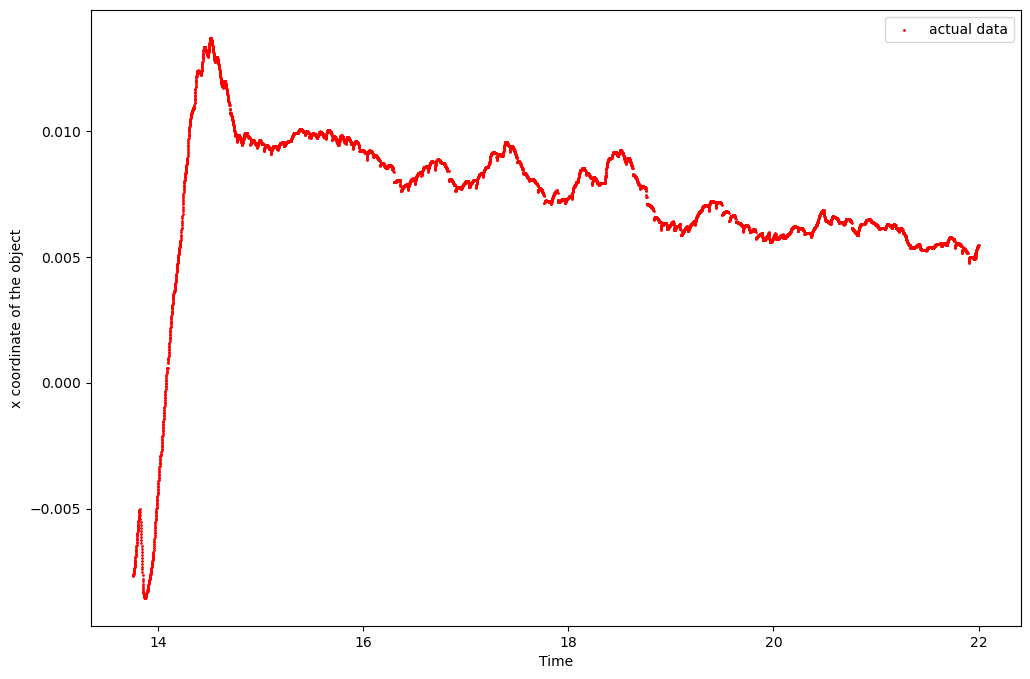

In [86]:
loh = x_ee - x_d
fig, ax = plt.subplots(figsize=(12,8))


ax.scatter(t_d, loh, color='r', label='actual data', s=1)


ax.set_xlabel('Time')
ax.set_ylabel('x coordinate of the object')
ax.legend()
plt.show()

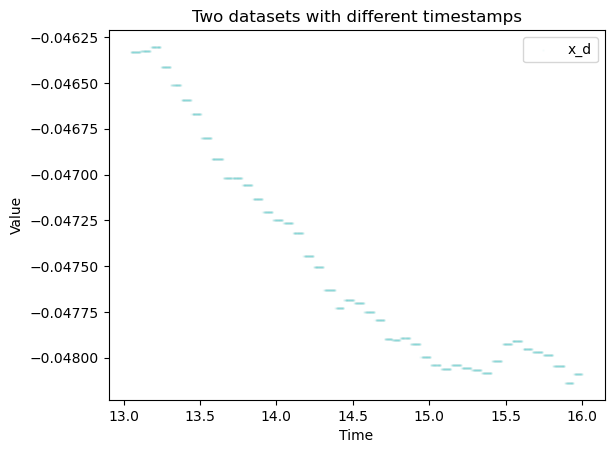

In [66]:
fig, ax = plt.subplots()


ax.scatter(t_d, x_v,color='c', label='x_d', s=1, alpha=0.02)


# Plot second dataset

ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Two datasets with different timestamps')
ax.legend()
plt.show()

In [87]:
t_r = np.array(t_r)          
z_real_sh = np.array(z_real_sh)

t_s = np.array(t_s)          
z_real_unsh = np.array(z_real_unsh)

t_kf = np.array(t_kf)          
z_kf = np.array(z_kf)

t_ee = np.array(t_ee)          
z_ee = np.array(z_ee)

t_d = np.array(t_d)          
z_d = np.array(z_d)

t_min = 12 
t_max =50

mask_z_sh = t_r < t_max
t_r = t_r[mask_z_sh]
z_real_sh = z_real_sh[mask_z_sh]

mask_z_unsh = t_s < t_max
t_s = t_s[mask_z_unsh]
z_real_unsh = z_real_unsh[mask_z_unsh]

mask_z_kf = t_kf < t_max
t_kf = t_kf[mask_z_kf]
z_kf = z_kf[mask_z_kf]

mask_z_ee = t_ee < t_max
t_ee = t_ee[mask_z_ee]
z_ee = z_ee[mask_z_ee]

mask_z_d = t_d < t_max
t_d = t_d[mask_z_d]
z_d = z_d[mask_z_d]

fig, az = plt.subplots()

az.scatter(t_r, z_real_sh, color='b', label='z_real_sh', s=1)
az.scatter(t_s, z_real_unsh, color='g', label='z_real_unsh', s=1)
#az.scatter(t_kf, z_kf, color='r', label='z_kf', s=1)
az.scatter(t_ee, z_ee, color='m', label='z_ee', s=1)
az.scatter(t_d, z_d, color='c', label='z_d', s=1, alpha=0.02)

# Plot second dataset

az.set_xlabel('Time')
az.set_ylabel('Value')
az.set_title('Two datasets with different timestamps')
az.legend()
plt.show()


IndexError: boolean index did not match indexed array along dimension 0; dimension is 131 but corresponding boolean dimension is 124

In [4]:
def test(a,b,c,d,e,f ,t):
    #print(a * t ** 4 + b * t ** 3 + c * t ** 2 + d * t ** 1 + e)
    #print(4 * a * t ** 3 + 3 * b * t ** 2 + 2 * c * t ** 1 + d)
    #print(12 * a * t ** 2 + 6 *b * t ** 1 + 2* c)
    return a * t ** 5 + b * t ** 4 + c * t ** 3 + d * t ** 2  + e * t + f, 5 * a * t ** 4 + 4 * b * t ** 3 + 3 * c * t ** 2 + 2* d * t + e, 20 * a * t ** 3 + 12 *b * t ** 2 + 6 * c * t + 2*d 

In [5]:
test(0.728604 ,-0.991212 , 0.393912, -0.014805 , 0.216501, .001)

TypeError: test() missing 1 required positional argument: 't'

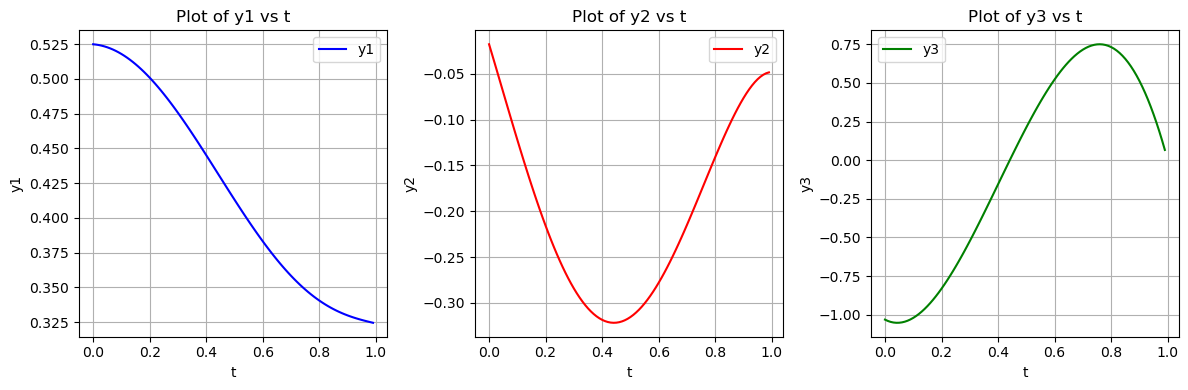

In [49]:
import numpy as np
import matplotlib.pyplot as plt

t_values = np.linspace(0, .99, 100)
y1_values = []
y2_values = []
y3_values = []

for t in t_values:
    y1, y2, y3 = test(-0.492023,   0.987264,  -0.162464 , -0.515967, -0.0176396,   0.524902, t)
    y1_values.append(y1)
    y2_values.append(y2)
    y3_values.append(y3)
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(t_values, y1_values, 'b-', label='y1')
plt.xlabel('t')
plt.ylabel('y1')
plt.title('Plot of y1 vs t')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(t_values, y2_values, 'r-', label='y2')
plt.xlabel('t')
plt.ylabel('y2')
plt.title('Plot of y2 vs t')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(t_values, y3_values, 'g-', label='y3')
plt.xlabel('t')
plt.ylabel('y3')
plt.title('Plot of y3 vs t')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [50]:
test(-0.492023,   0.987264,  -0.162464 , -0.515967, -0.0176396,   0.524902, 0.063)

(0.5217172725708755, -0.08363720533801852, -1.04878455970962)

In [ ]:

Data  0.524902 -0.476937  0.210611  0.324073 -0.422137  0.254801
 -0.0176396  -0.0132022 -0.00479293  0.00184575   0.0122364  -0.0370418  -0.0480221  0.00117247 -0.00170574
t diff 0
 -0.492023   0.987264  -0.162464  -0.515967 -0.0176396   0.524902
  0.173986  -0.346703  0.0498164   0.190902 -0.0132022  -0.476937
   0.141033   -0.282325   0.0466703    0.143604 -0.00479293    0.210611
pos error 0.524902 -0.476937  0.210611  0.524902 -0.476937  0.210611
